# Begee Database

In [1]:
# The usual preamble
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default')

import numpy as np
import IPython
import seaborn
import os

In [2]:
def groupby_counts(df, columns):
    """Group datagrame by columns and return the number of rows for each grouping."""
    grouped = df.groupby(columns)
    df = grouped[columns[0]].agg([len])
    df = df.reset_index()
    df = df.sort('len', ascending=False)
    return df

In [3]:
def GetFiles(location):
    # Change to directory
    os.chdir(location)
    
    # List to hold file names
    FileNames = []
    
    # Find any file that ends with ".tsv"
    for files in os.listdir("."):
        if files.endswith(".tsv"):
            FileNames.append(files)
    
    # Create a list of dataframes
    df_list = []
    for fname in FileNames:
        loc_file = location + fname
        df = pd.read_table(loc_file)
        # Tag record to file name
        df['File'] = fname
        # Extract species name
        df['SP'] = df.File.str.extract('(^[A-Za-z]+_[A-Za-z]+)')
        df_list += [df]
    
    df = pd.concat(df_list)
    return df

## Header of present/absent file

In [4]:
# Your path will be different, please modify the path below.
location = r'/Users/csanchez/Dropbox/Proyectos_Activos/bgee/jupyter/Complete/'
present_df = GetFiles(location)
present_df.head()

,Gene ID,Gene name,Anatomical entity ID,Anatomical entity name,Developmental stage ID,Developmental stage name,Expression,Call quality,Including observed data,Affymetrix data,...,EST call quality,Including EST observed data,In situ data,In situ call quality,Including in situ observed data,RNA-Seq data,RNA-Seq call quality,Including RNA-Seq observed data,File,SP
0,ENSACAG00000000002,CAD,UBERON:0000061,anatomical structure,UBERON:0000066,fully formed stage,present,high quality,no,no data,...,no data,no,no data,no data,no,present,high quality,no,Anolis_carolinensis_expr-complete.tsv,Anolis_carolinensis
1,ENSACAG00000000002,CAD,UBERON:0000061,anatomical structure,UBERON:0000092,post-embryonic stage,present,high quality,no,no data,...,no data,no,no data,no data,no,present,high quality,no,Anolis_carolinensis_expr-complete.tsv,Anolis_carolinensis
2,ENSACAG00000000002,CAD,UBERON:0000061,anatomical structure,UBERON:0000104,life cycle,present,high quality,no,no data,...,no data,no,no data,no data,no,present,high quality,no,Anolis_carolinensis_expr-complete.tsv,Anolis_carolinensis
3,ENSACAG00000000002,CAD,UBERON:0000061,anatomical structure,UBERON:0000113,post-juvenile adult stage,present,high quality,no,no data,...,no data,no,no data,no data,no,present,high quality,no,Anolis_carolinensis_expr-complete.tsv,Anolis_carolinensis
4,ENSACAG00000000002,CAD,UBERON:0000383,musculature of body,UBERON:0000066,fully formed stage,present,high quality,no,no data,...,no data,no,no data,no data,no,present,high quality,no,Anolis_carolinensis_expr-complete.tsv,Anolis_carolinensis


## Header of over/under expression across anatomy files

In [5]:
# Your path will be different, please modify the path below.
location = r'/Users/csanchez/Dropbox/Proyectos_Activos/bgee/jupyter/Anatomy/'
anatomy_df = GetFiles(location)
anatomy_df.head()

,Gene ID,Gene name,Anatomical entity ID,Anatomical entity name,Developmental stage ID,Developmental stage name,Differential expression,Call quality,Affymetrix data,Affymetrix call quality,Affymetrix best supporting p-value,Affymetrix analysis count supporting Affymetrix call,Affymetrix analysis count in conflict with Affymetrix call,RNA-Seq data,RNA-Seq call quality,RNA-Seq best supporting p-value,RNA-Seq analysis count supporting RNA-Seq call,RNA-Seq analysis count in conflict with RNA-Seq call,File,SP
0,ENSBTAG00000000005,ADRBK2,UBERON:0000082,adult mammalian kidney,UBERON:0018241,prime adult stage,under-expression,high quality,no data,NaN,1,0,0,under-expression,high quality,1.063067e-05,1,0,Bos_taurus_diffexpr-anatomy-complete.tsv,Bos_taurus
1,ENSBTAG00000000005,ADRBK2,UBERON:0000473,testis,UBERON:0018241,prime adult stage,over-expression,high quality,no data,NaN,1,0,0,over-expression,high quality,5.140845e-09,1,0,Bos_taurus_diffexpr-anatomy-complete.tsv,Bos_taurus
2,ENSBTAG00000000005,ADRBK2,UBERON:0000948,heart,UBERON:0018241,prime adult stage,no diff expression,high quality,no data,NaN,1,0,0,no diff expression,high quality,3.300212e-01,1,0,Bos_taurus_diffexpr-anatomy-complete.tsv,Bos_taurus
3,ENSBTAG00000000005,ADRBK2,UBERON:0000955,brain,UBERON:0018241,prime adult stage,over-expression,high quality,no data,NaN,1,0,0,over-expression,high quality,1.297402e-04,1,0,Bos_taurus_diffexpr-anatomy-complete.tsv,Bos_taurus
4,ENSBTAG00000000005,ADRBK2,UBERON:0001134,skeletal muscle tissue,UBERON:0018241,prime adult stage,under-expression,high quality,no data,NaN,1,0,0,under-expression,high quality,5.094150e-04,1,0,Bos_taurus_diffexpr-anatomy-complete.tsv,Bos_taurus


## Header of over/under expression across life stages files

In [6]:
# Your path will be different, please modify the path below.
location = r'/Users/csanchez/Dropbox/Proyectos_Activos/bgee/jupyter/Life/'
life_df = GetFiles(location)
life_df.head()

,Gene ID,Gene name,Anatomical entity ID,Anatomical entity name,Developmental stage ID,Developmental stage name,Differential expression,Call quality,Affymetrix data,Affymetrix call quality,Affymetrix best supporting p-value,Affymetrix analysis count supporting Affymetrix call,Affymetrix analysis count in conflict with Affymetrix call,RNA-Seq data,RNA-Seq call quality,RNA-Seq best supporting p-value,RNA-Seq analysis count supporting RNA-Seq call,RNA-Seq analysis count in conflict with RNA-Seq call,File,SP
0,WBGene00000001,aap-1,UBERON:0000468,multi-cellular organism,UBERON:0000066,fully formed stage,no diff expression,high quality,no data,NaN,1,0,0,no diff expression,high quality,0.129350,1,0,Caenorhabditis_elegans_diffexpr-development-co...,Caenorhabditis_elegans
1,WBGene00000001,aap-1,UBERON:0000468,multi-cellular organism,UBERON:0000068,embryo stage,no diff expression,high quality,no data,NaN,1,0,0,no diff expression,high quality,0.972053,1,0,Caenorhabditis_elegans_diffexpr-development-co...,Caenorhabditis_elegans
2,WBGene00000001,aap-1,UBERON:0000468,multi-cellular organism,UBERON:0000108,blastula stage,no diff expression,high quality,no data,NaN,1,0,0,no diff expression,high quality,0.876328,1,0,Caenorhabditis_elegans_diffexpr-development-co...,Caenorhabditis_elegans
3,WBGene00000001,aap-1,UBERON:0000468,multi-cellular organism,UBERON:0000109,gastrula stage,no diff expression,high quality,no data,NaN,1,0,0,no diff expression,high quality,0.681341,1,0,Caenorhabditis_elegans_diffexpr-development-co...,Caenorhabditis_elegans
4,WBGene00000001,aap-1,UBERON:0000468,multi-cellular organism,UBERON:0004729,nematode larval stage,no diff expression,high quality,no data,NaN,1,0,0,no diff expression,high quality,0.052285,1,0,Caenorhabditis_elegans_diffexpr-development-co...,Caenorhabditis_elegans


## Total Number of genes

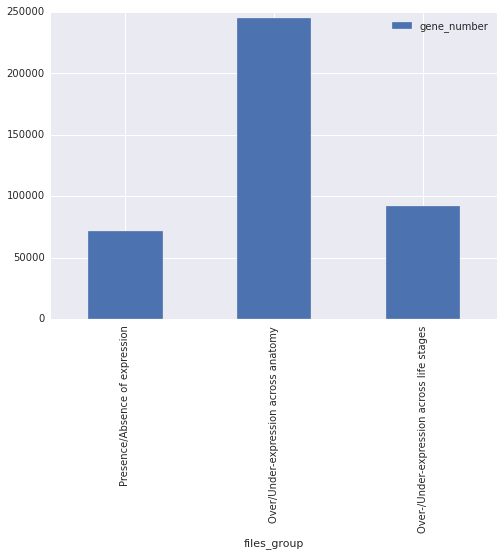

In [7]:
# get the total number of unique genes in bgee database
present_genes_id = present_df['Gene ID'].unique()
anatomy_genes_id = anatomy_df['Gene ID'].unique()
life_genes_id = life_df['Gene ID'].unique()
genes_id_df = pd.DataFrame({'files_group' : pd.Series(['Presence/Absence of expression', 'Over/Under-expression across anatomy', 'Over-/Under-expression across life stages']),
                            'gene_number' : pd.Series([len(present_genes_id), len(anatomy_genes_id), len(life_genes_id)])})
genes_id_df.index = genes_id_df['files_group']
genes_id_df.plot(kind='bar')

## Number of genes per species

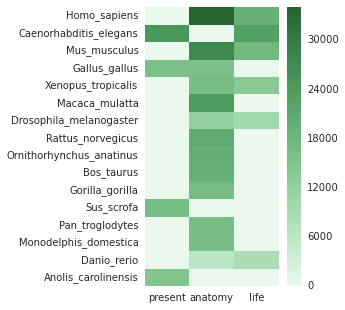

In [8]:
grouped_present_df = groupby_counts(present_df, ['SP', 'Gene ID'])
grouped_anatomy_df = groupby_counts(anatomy_df, ['SP', 'Gene ID'])
grouped_life_df = groupby_counts(life_df, ['SP', 'Gene ID'])
df1 = pd.DataFrame(grouped_present_df['SP'].value_counts(), columns=['present'])
df2 = pd.DataFrame(grouped_anatomy_df['SP'].value_counts(), columns=['anatomy'])
df3 = pd.DataFrame(grouped_life_df['SP'].value_counts(), columns=['life'])
df = pd.concat([df1, df2, df3], axis = 1).fillna(0)
df['order'] = df['present'] + df['anatomy'] + df['life']
df = df.sort('order', ascending=False)
IPython.core.pylabtools.figsize(3, 5)
cmap = seaborn.cubehelix_palette(15, start=2, rot=0, gamma=1, hue=1, light=0.95, dark=0.3, as_cmap=True)
seaborn.heatmap(df.drop(['order'], axis=1), cmap=cmap)

## Number of anatomical structure per species

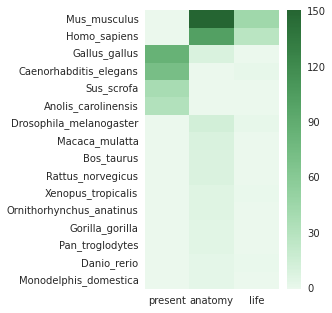

In [9]:
grouped_present_df = groupby_counts(present_df, ['SP', 'Anatomical entity ID'])
grouped_anatomy_df = groupby_counts(anatomy_df, ['SP', 'Anatomical entity ID'])
grouped_life_df = groupby_counts(life_df, ['SP', 'Anatomical entity ID'])
df1 = pd.DataFrame(grouped_present_df['SP'].value_counts(), columns=['present'])
df2 = pd.DataFrame(grouped_anatomy_df['SP'].value_counts(), columns=['anatomy'])
df3 = pd.DataFrame(grouped_life_df['SP'].value_counts(), columns=['life'])
df = pd.concat([df1, df2, df3], axis = 1).fillna(0)
df['order'] = df['present'] + df['anatomy'] + df['life']
df = df.sort('order', ascending=False)
IPython.core.pylabtools.figsize(3, 5)
cmap = seaborn.cubehelix_palette(15, start=2, rot=0, gamma=1, hue=1, light=0.95, dark=0.3, as_cmap=True)
seaborn.heatmap(df.drop(['order'], axis=1), cmap=cmap)

## Number of develomental stages per species

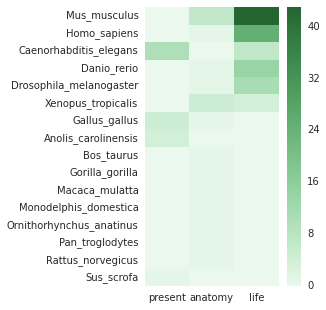

In [10]:
grouped_present_df = groupby_counts(present_df, ['SP', 'Developmental stage ID'])
grouped_anatomy_df = groupby_counts(anatomy_df, ['SP', 'Developmental stage ID'])
grouped_life_df = groupby_counts(life_df, ['SP', 'Developmental stage ID'])
df1 = pd.DataFrame(grouped_present_df['SP'].value_counts(), columns=['present'])
df2 = pd.DataFrame(grouped_anatomy_df['SP'].value_counts(), columns=['anatomy'])
df3 = pd.DataFrame(grouped_life_df['SP'].value_counts(), columns=['life'])
df = pd.concat([df1, df2, df3], axis = 1).fillna(0)
df['order'] = df['present'] + df['anatomy'] + df['life']
df = df.sort('order', ascending=False)
IPython.core.pylabtools.figsize(3, 5)
cmap = seaborn.cubehelix_palette(15, start=2, rot=0, gamma=1, hue=1, light=0.95, dark=0.3, as_cmap=True)
seaborn.heatmap(df.drop(['order'], axis=1), cmap=cmap)

## Number of genes with diferent kind of expresion per species

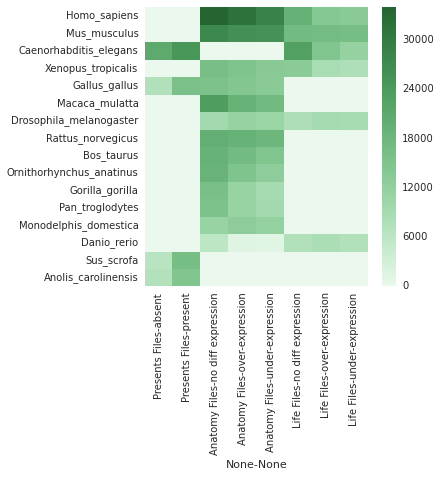

In [41]:
grouped_df = groupby_counts(present_df, ['SP', 'Expression', 'Gene ID'])
grouped_df = groupby_counts(grouped_df, ['SP', 'Expression'])
df1 = grouped_df.pivot('SP', 'Expression', 'len').fillna(0)

grouped_df = groupby_counts(anatomy_df, ['SP', 'Differential expression', 'Gene ID'])
grouped_df = groupby_counts(grouped_df, ['SP', 'Differential expression'])
df2 = grouped_df.pivot('SP', 'Differential expression', 'len').fillna(0)

grouped_df = groupby_counts(life_df, ['SP', 'Differential expression', 'Gene ID'])
grouped_df = groupby_counts(grouped_df, ['SP', 'Differential expression'])
df3 = grouped_df.pivot('SP', 'Differential expression', 'len').fillna(0)

df = pd.concat([df1, df2, df3], axis=1, keys=['Presents Files', 'Anatomy Files', 'Life Files']).fillna(0)
df['order'] = df['Presents Files']['absent'] + df['Presents Files']['present'] + df['Anatomy Files']['no diff expression'] + df['Anatomy Files']['over-expression'] + df['Anatomy Files']['under-expression'] + df['Life Files']['no diff expression'] + df['Life Files']['over-expression'] + df['Life Files']['under-expression']
df = df.sort('order', ascending=False)
df = df.drop([('Presents Files', 'high ambiguity'), ('Presents Files', 'low ambiguity')], axis=1)
df = df.drop([('Anatomy Files', 'high ambiguity'), ('Anatomy Files', 'low ambiguity')], axis=1)
#df = df.drop([('Life Files', 'high ambiguity'), ('Life Files', 'low ambiguity')], axis=1)

IPython.core.pylabtools.figsize(5, 5)
cmap = seaborn.cubehelix_palette(15, start=2, rot=0, gamma=1, hue=1, light=0.95, dark=0.3, as_cmap=True)
seaborn.heatmap(df.drop(['order'], axis=1), cmap=cmap);

## Number of conditions per species

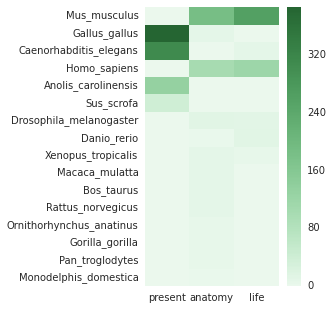

In [48]:
grouped_df = groupby_counts(present_df, ['SP', 'Developmental stage name', 'Anatomical entity name'])
df1 = pd.DataFrame(grouped_df['SP'].value_counts(), columns=['present'])

grouped_df = groupby_counts(anatomy_df, ['SP', 'Developmental stage name', 'Anatomical entity name'])
df2 = pd.DataFrame(grouped_df['SP'].value_counts(), columns=['anatomy'])

grouped_df = groupby_counts(life_df, ['SP', 'Developmental stage name', 'Anatomical entity name'])
df3 = pd.DataFrame(grouped_df['SP'].value_counts(), columns=['life'])

df = pd.concat([df1, df2, df3], axis = 1).fillna(0)
df['order'] = df['present'] + df['anatomy'] + df['life']
df = df.sort('order', ascending=False)

IPython.core.pylabtools.figsize(3, 5)
cmap = seaborn.cubehelix_palette(15, start=2, rot=0, gamma=1, hue=1, light=0.95, dark=0.3, as_cmap=True)
seaborn.heatmap(df.drop(['order'], axis=1), cmap=cmap)